In [46]:
%matplotlib inline

In [28]:
import logging
from utils import logging as lg
lg.set_logging(logging.ERROR)


from skimage.measure import block_reduce
import numpy as np

import logging

import pandas as pd
import pickle
from notebook_utils import plot 
import seaborn as sns
sns.set(color_codes=True, font_scale=2, style="whitegrid", palette="bright")

from model import base, provider, heatmap_evaluation
import config
import matplotlib.pyplot as plt
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
from utils import data_provider

In [3]:
dataset_loader = data_provider.DatasetLoader(data_dir='../data')

# Heatmaps

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


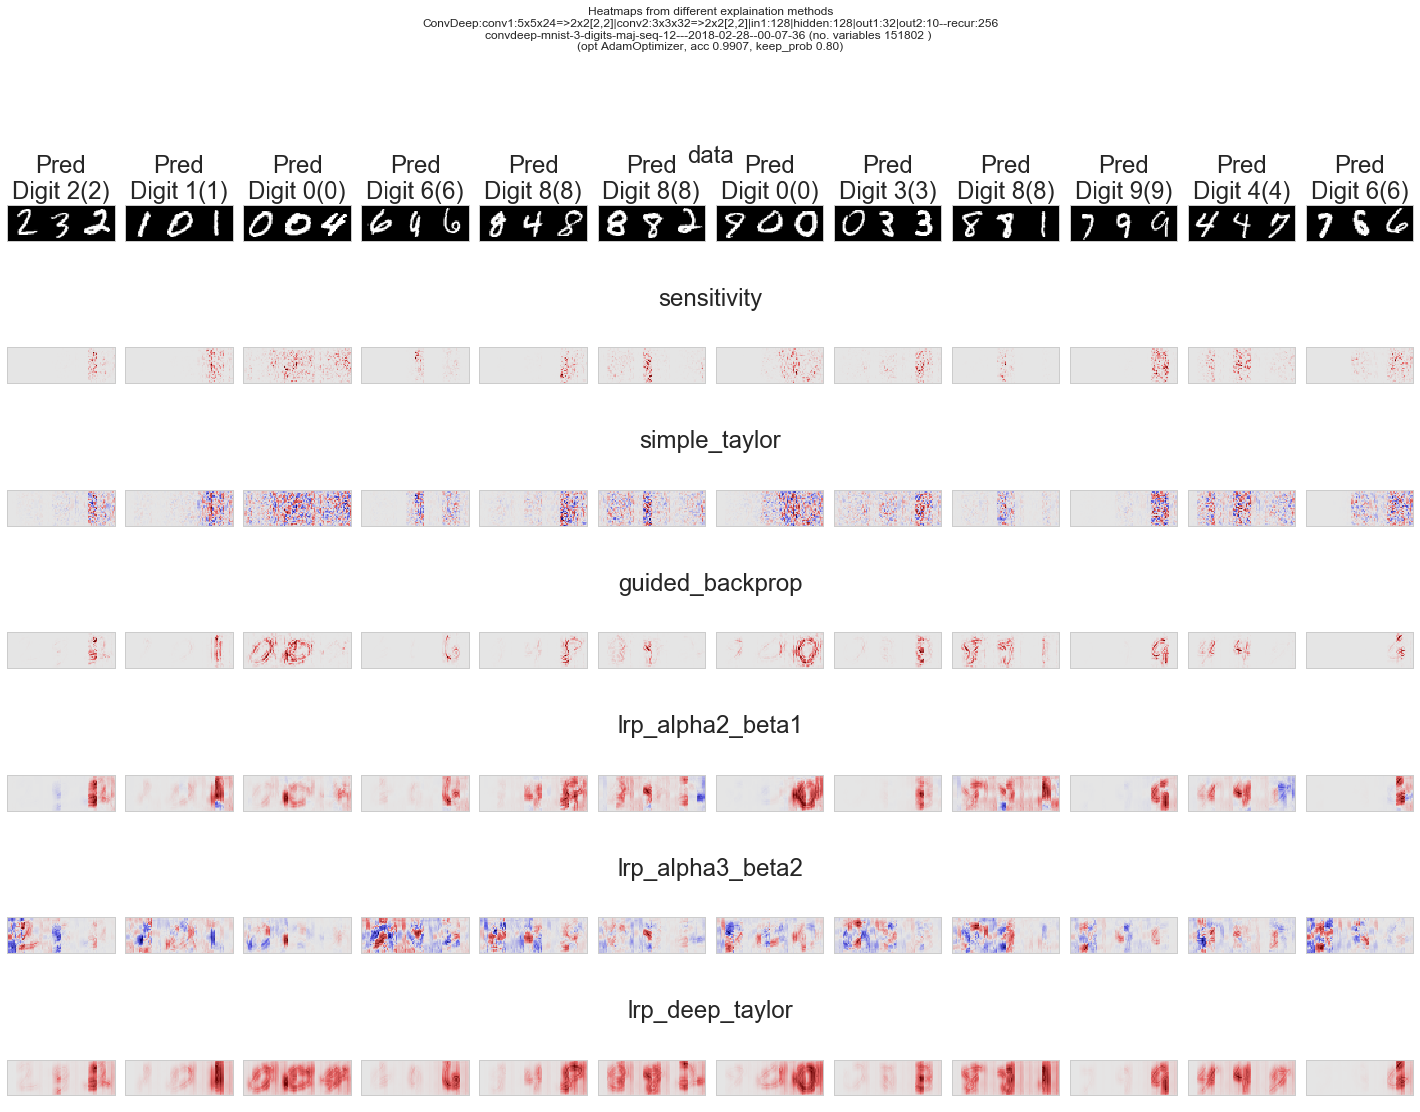

In [64]:
plot.plot_relevance_methods("../final-models/convdeep-mnist-3-digits-maj-seq-12", 
                            dataset_loader) 

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


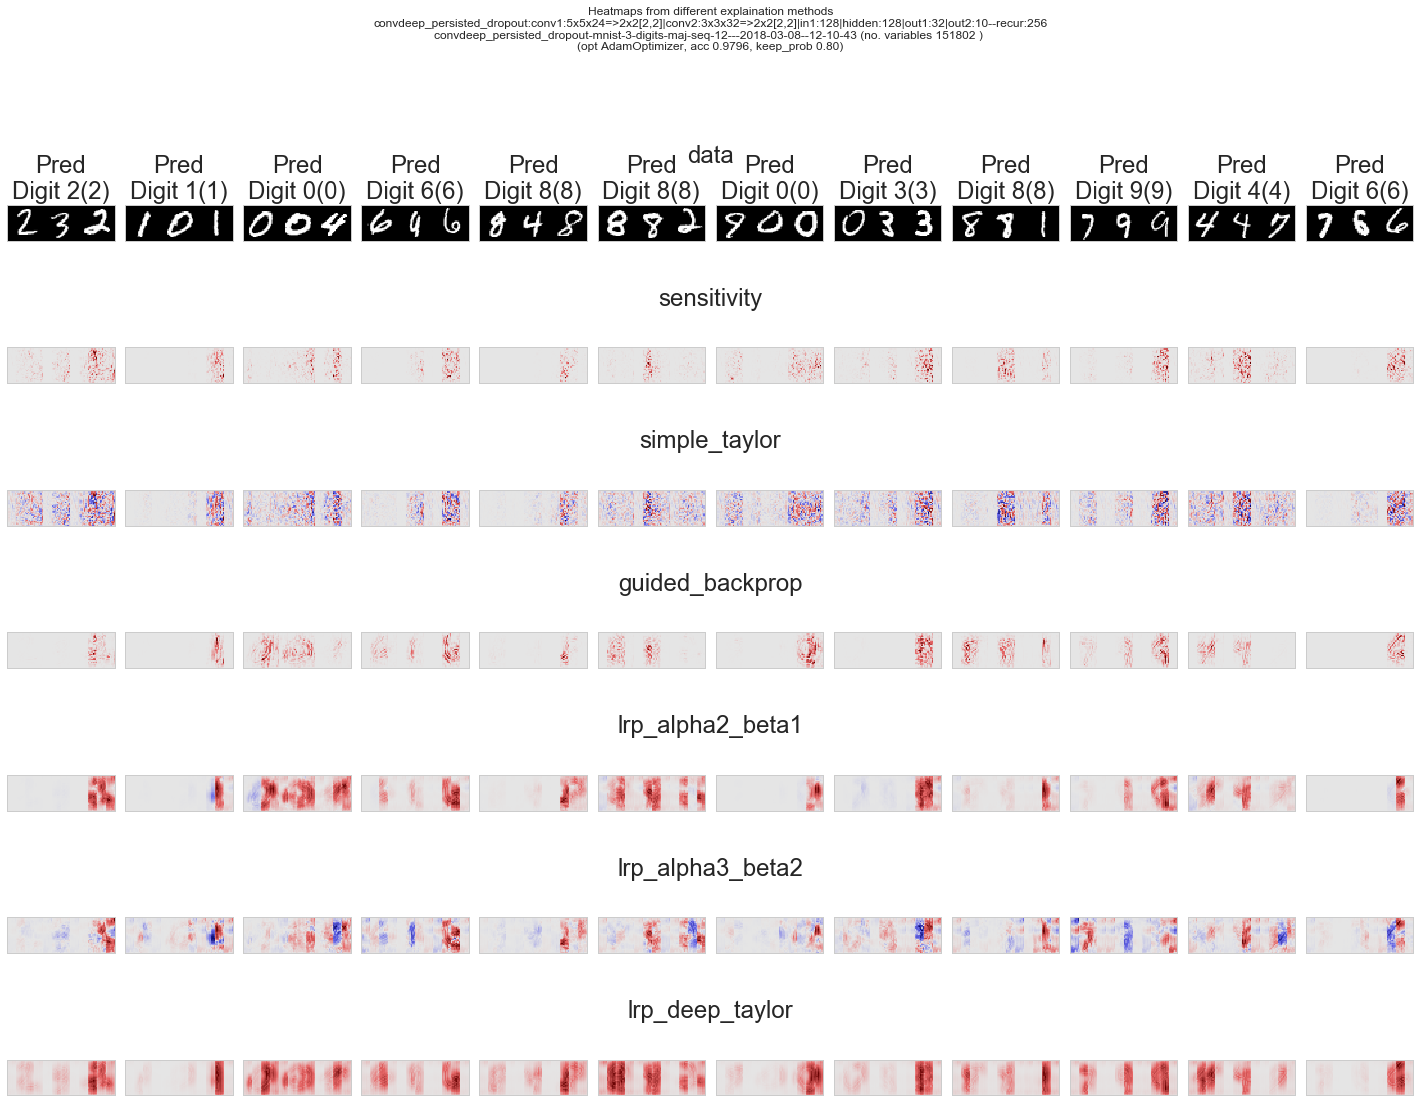

In [65]:
plot.plot_relevance_methods("../experiment-results/models-for-exp3/convdeep_persisted_dropout-mnist-3-digits-maj-seq-12---2018-03-08--12-10-43", 
                            dataset_loader) 

In [66]:
# plot.plot_relevance_methods("../experiment-results/models-for-exp3/convdeep_persisted_dropout-fashion-mnist-3-items-maj-seq-12---2018-03-08--01-32-44", 
#                             dataset_loader, only_positive_rel=False, methods=methods, verbose=False) 

# Stats

[]


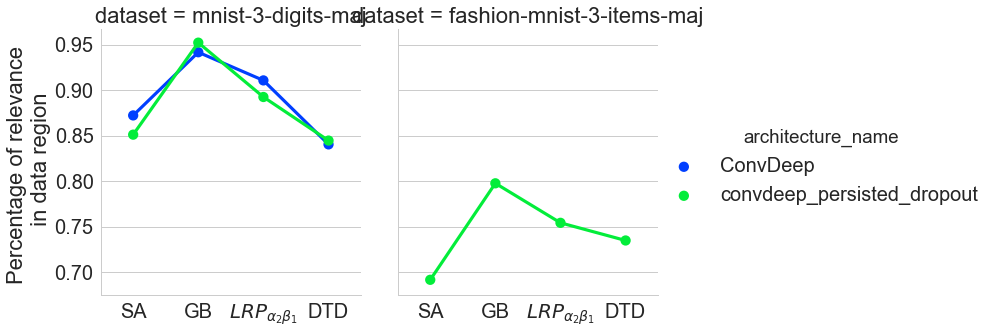

In [69]:
def plot_relevance_dist_in_middle_region(models, methods=['sensitivity', 'guided_backprop', 'lrp_alpha2_beta1', 'lrp_deep_taylor']):
    results = []
    print(results)
    architectures = []
    for m in models:
            file = "%s/rel-dist.pkl" % (m)
            try:
                data = pickle.load(open(file, "rb"))
                architectures.append(data[0]['architecture'])
                results = results + data
            except:
                print('%s not found' % file)

    architectures = set(architectures)
    architecture_idx = dict(zip(architectures, range(len(architectures))))
    df = None
    df = pd.DataFrame(results)
    df = df[df.method.isin(methods)]
    
    def get_marker_linestyle(method):
        if method == 'guided_backprop':
            mk = 's'
            ls = '-'
        elif 'lrp' in method:
            mk = '^'
            ls = '-'
        else:
            mk = '.'
            ls =':'
        return mk, ls
    
    marker_linestyles = [get_marker_linestyle(m) for m in methods]
#     print(df)

    df['architecture_idx'] = df['architecture'].apply(lambda x : architecture_idx[x])
    df['architecture_name'] = df['architecture'].apply(config.architecture_name)
    method_indices = dict(zip(methods, range(len(methods))))
    df['method_idx'] = df['method'].apply(lambda m: method_indices[m])

    col_name = 'Percentage of relevance \n in data region'
    df[col_name] = df['rel_dist_in_data_region']


    g = sns.factorplot(x="method_idx", y=col_name, col='dataset', hue="architecture_name",
                       data=df, size=5)
#                            linestyles=linestyles)

    g.set_xticklabels(['SA', 'GB',  '$LRP_{\\alpha_2\\beta_1}$', 'DTD'])
    g.set(xlabel='')
    return df


_ = plot_relevance_dist_in_middle_region(models=[
    "../experiment-results/models-for-exp3/convdeep-mnist-3-digits-maj-seq-12---2018-03-08--10-13-12", # 100 epochs
#     "../experiment-results/models-for-exp3/convdeep_persisted_dropout-mnist-3-digits-maj-seq-12---2018-03-08--01-31-57", # 50 epochs
#     "../experiment-results/models-for-exp3/convdeep_persisted_dropout-mnist-3-digits-maj-seq-12---2018-03-08--09-58-02", # 100 epoch
    "../experiment-results/models-for-exp3/convdeep_persisted_dropout-mnist-3-digits-maj-seq-12---2018-03-08--12-10-43", # persisted mark only rr
    "../experiment-results/models-for-exp3/convdeep_persisted_dropout-fashion-mnist-3-items-maj-seq-12---2018-03-08--01-32-44",
#     "../final-models/convdeep-fashion-mnist-3-items-maj-seq-12",
])

[]


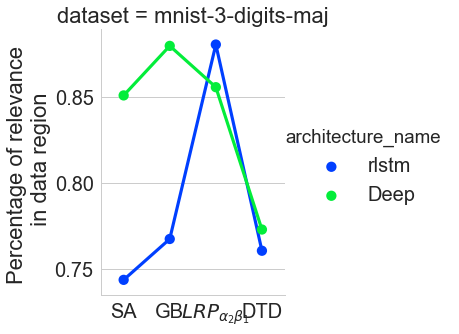

In [71]:
_ = plot_relevance_dist_in_middle_region(models=[
    '../experiment-results/models-for-exp3/rlstm-mnist-3-digits-maj-seq-12---2018-03-10--03-21-41',
    '../experiment-results/models-for-exp3/deep-mnist-3-digits-maj-seq-12---2018-03-10--03-21-55'
])